<a href="https://colab.research.google.com/github/19srishti/Brain-tumor-detection/blob/main/brain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
from cv2 import imread
import matplotlib.pyplot as plt

import keras
from keras.layers import Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import ResNet50, VGG19


import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

path='/content/drive/MyDrive/brain_tumor_dataset'
#advertising = pd.read_csv(path)

image_generator = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=2, 
    vertical_flip=2, 
    validation_split=0.1)    

training_set = image_generator.flow_from_directory(batch_size=16,
                                                 directory=path,
                                                 shuffle=True,
                                                 target_size=(224,224), 
                                                 subset="training",
                                                 color_mode='rgb',
                                                 class_mode='binary')

testing_set = image_generator.flow_from_directory(batch_size=16,
                                                 directory=path,
                                                 shuffle=True,
                                                 target_size=(224,224), 
                                                 subset="validation",
                                                  color_mode='rgb',
                                                 class_mode='binary')

Found 229 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


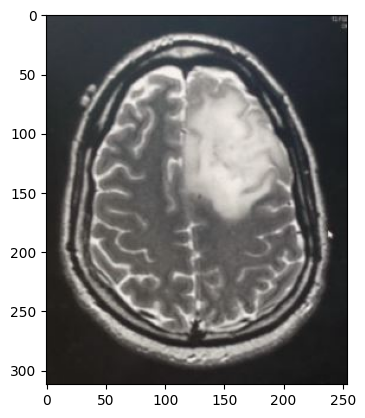

In [ ]:
yes_path = path+"/yes/"+os.listdir(path+"/yes/")[4]
tumour = imread(yes_path)
plt.imshow(tumour)

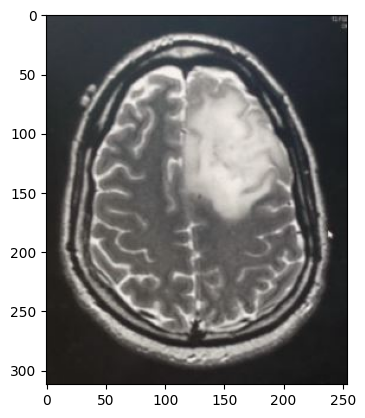

In [ ]:
no_path = path+"/no/"+os.listdir(path+"/no/")[4]
tumour = imread(yes_path)
plt.imshow(tumour)

In [ ]:
testing_set.class_indices

{'no': 0, 'yes': 1}

In [ ]:
model = ResNet50(
      input_shape = (224,224,3),
      include_top = False,
      weights = 'imagenet'
    )

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
for layers in model.layers:
    layers.trainable = False

In [ ]:
x = Flatten()(model.output)
x = Dropout(0.4)(x)
x = Dense(1, activation = "sigmoid")(x)

model = keras.Model(model.input, x)
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
hist = model.fit_generator(training_set,validation_data = testing_set, epochs = 10)

Epoch 1/10
15/15 [==============================] - 55s 4s/step - loss: 0.4181 - accuracy: 0.8428 - val_loss: 0.4939 - val_accuracy: 0.7917
Epoch 2/10
15/15 [==============================] - 53s 3s/step - loss: 0.5412 - accuracy: 0.7467 - val_loss: 0.4786 - val_accuracy: 0.7500
Epoch 3/10
15/15 [==============================] - 56s 4s/step - loss: 0.5024 - accuracy: 0.7817 - val_loss: 0.4236 - val_accuracy: 0.7917
Epoch 4/10
15/15 [==============================] - 59s 4s/step - loss: 0.5254 - accuracy: 0.7904 - val_loss: 0.5496 - val_accuracy: 0.7083
Epoch 5/10
15/15 [==============================] - 52s 4s/step - loss: 0.6600 - accuracy: 0.7380 - val_loss: 0.5101 - val_accuracy: 0.8333
Epoch 6/10
15/15 [==============================] - 57s 4s/step - loss: 0.4939 - accuracy: 0.8079 - val_loss: 0.4662 - val_accuracy: 0.7500
Epoch 7/10
15/15 [==============================] - 51s 3s/step - loss: 0.4177 - accuracy: 0.7991 - val_loss: 0.8699 - val_accuracy: 0.7500
Epoch 8/10
15/15 [==

In [ ]:
hist = hist.history

Text(0, 0.5, 'accuracy')

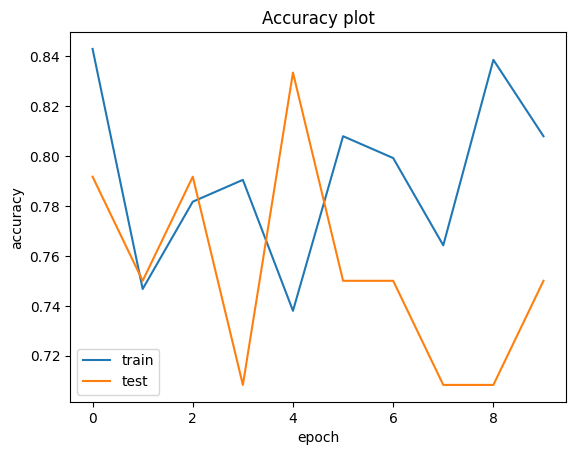

In [ ]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

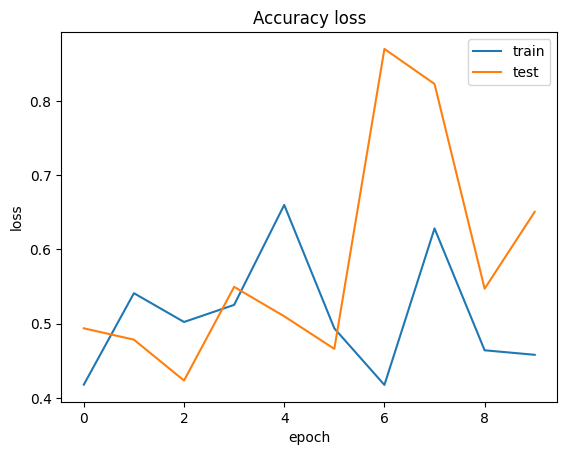

In [ ]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")